### EXPLORE DATA

In [1]:
# !pip install seaborn

In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from db_connection import get_engine
engine = get_engine()

import warnings
warnings.filterwarnings('ignore')
print('Done!')

Done!


In [45]:
# loaded_data = pd.read_csv('data/Churn_Modelling.csv')
# churn_data = loaded_data.copy()
# display(churn_data.head())

In [44]:

loaded_data = pd.read_sql("SELECT * FROM customers", engine)
churn_data = loaded_data.copy()
display(churn_data.head())


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
print("===================check for missing values===================")
print(churn_data.isna().sum())
print("===================Show the dimension of DataFrame============")
print(churn_data.shape)
print("==================Show all columns in DataFrame ===============\n")
print(churn_data.columns.to_list())


===================check for missing values===================
rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64
===================Show the dimension of DataFrame============
(10000, 14)
==================Show all columns in DataFrame ===============

['rownumber', 'customerid', 'surname', 'creditscore', 'geography', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']


In [27]:
print("=============column names and data types=============")

print(churn_data.dtypes)
print(":====================Dataset Info:====================\n ")
print(churn_data.info())

=============column names and data types=============
rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object
:====================Dataset Info:====================
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age             

In [28]:
# 5. Basic Stats (Mean, Median, Distribution)
print("Basic statistics for numerical column:")
display(churn_data.describe())

Basic statistics for numerical column:


,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [29]:
print("==========basic statistics for categorical columns =============")
# categorical columns only
categorical_cols = churn_data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    display(churn_data[categorical_cols].describe())
else:
    print("No categorical columns are found.!")

==========basic statistics for categorical columns =============


,surname,geography,gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [35]:
# Check Class Imbalance in 'Exited'

print("\nClass Distribution for 'Exited' (Churn):")
print("======================Counts======================")
print(churn_data['exited'].value_counts())
print("\n======================Percentages======================")
print(churn_data['exited'].value_counts(normalize=True) * 100)


Class Distribution for 'Exited' (Churn):
======================Counts======================
exited
0    7963
1    2037
Name: count, dtype: int64

======================Percentages======================
exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [36]:
# Calculate imbalance ratio
exited_counts = churn_data['exited'].value_counts()
imbalance_ratio = exited_counts[0] / exited_counts[1] if len(exited_counts) > 1 else 0
print(f"\nImbalance Ratio (Non-Churned/Churned): {imbalance_ratio:.2f}")


Imbalance Ratio (Non-Churned/Churned): 3.91


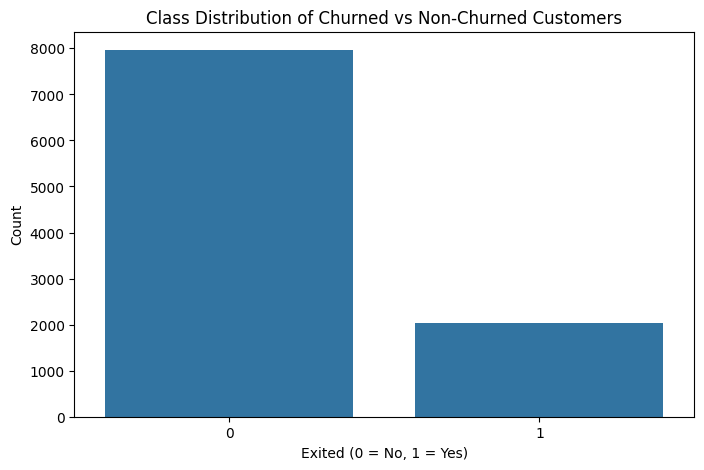

In [37]:
# create a simple visualization of the class distribution


plt.figure(figsize=(8, 5))
sns.countplot(x='exited', data=churn_data)
plt.title('Class Distribution of Churned vs Non-Churned Customers')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()